In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter

def create_focused_wordcloud(input_file, sentiment=None):
    """
    Create a word cloud focusing only on meaningful descriptive terms using a whitelist approach.
    
    Parameters:
    input_file (str): Path to the CSV file
    sentiment (str): Optional - 'positive' or 'negative' to filter by sentiment
    """
    # Read the dataset
    df = pd.read_csv(input_file)
    
    # Filter by sentiment if specified
    if sentiment:
        df = df[df['sentiment'] == sentiment]
    
    # Define whitelisted terms by category
    whitelist = {
        'quality': {
            'excellent', 'poor', 'terrible', 'great', 'good', 'bad', 'superior',
            'inferior', 'perfect', 'flawless', 'defective', 'solid', 'weak',
            'premium', 'cheap', 'reliable', 'unreliable', 'durable', 'flimsy',
            'robust', 'sturdy', 'fragile'
        },
        'performance': {
            'fast', 'slow', 'quick', 'laggy', 'responsive', 'unresponsive',
            'smooth', 'choppy', 'efficient', 'inefficient', 'powerful',
            'weak', 'consistent', 'inconsistent', 'accurate', 'inaccurate',
            'precise', 'imprecise'
        },
        'reliability': {
            'broke', 'broken', 'lasting', 'failed', 'fails', 'stable',
            'unstable', 'consistent', 'inconsistent', 'dependable',
            'undependable', 'trustworthy', 'unreliable', 'dies', 'died'
        },
        'value': {
            'expensive', 'overpriced', 'cheap', 'reasonable', 'worth',
            'worthwhile', 'bargain', 'costly', 'affordable', 'unaffordable',
            'valuable', 'invaluable', 'pricey', 'pricy'
        },
        'emotional': {
            'love', 'hate', 'disappointed', 'satisfied', 'happy', 'unhappy',
            'pleased', 'displeased', 'amazed', 'frustrated', 'angry',
            'delighted', 'regret', 'impressed', 'unimpressed'
        },
        'usability': {
            'easy', 'difficult', 'simple', 'complicated', 'intuitive',
            'confusing', 'straightforward', 'complex', 'convenient',
            'inconvenient', 'user-friendly', 'clunky', 'awkward'
        }
    }
    
    # Combine all whitelisted terms
    all_whitelist_terms = set().union(*whitelist.values())
    
    def extract_whitelisted_words(text):
        """Extract only whitelisted words from text."""
        words = text.lower().split()
        return ' '.join(word for word in words if word in all_whitelist_terms)
    
    # Process all reviews and combine whitelisted words
    text = ' '.join(df['review_text'].dropna().astype(str).apply(extract_whitelisted_words))
    
    # Create word frequencies
    word_freq = Counter(text.split())
    
    # Print top terms by category
    print(f"\nTop terms by category for {sentiment if sentiment else 'all'} reviews:")
    for category, terms in whitelist.items():
        category_words = {word: count for word, count in word_freq.items() if word in terms}
        if category_words:
            print(f"\n{category.title()}:")
            sorted_words = sorted(category_words.items(), key=lambda x: x[1], reverse=True)
            for word, count in sorted_words[:5]:  # Top 5 words in each category
                print(f"  {word}: {count}")
    
    # Create and configure the WordCloud object
    wordcloud = WordCloud(
        height=800,
        background_color='white',
        max_words=100,
        collocations=False,
        contour_width=3,
        contour_color='steelblue'
    )
    
    # Generate word cloud
    wordcloud = wordcloud.generate(text)
    
    # Create the plot
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    # Add title based on sentiment
    title = "Word Cloud - Meaningful Terms in "
    title += f"{sentiment.capitalize()} Reviews" if sentiment else "All Reviews"
    plt.title(title, fontsize=16, pad=20)
    
    plt.show()


input_file = "../data/processed/final_indepth_sentiment_analysis_w_processed_category.csv"

# Generate word clouds and print category analysis
print("Generating word clouds and category analysis...")

# All reviews
create_focused_wordcloud(input_file)

# Positive reviews only
create_focused_wordcloud(input_file, sentiment='positive')

# Negative reviews only
create_focused_wordcloud(input_file, sentiment='negative')

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

Key Insights:

1. Overall Sentiment Words
- Most common positive descriptors: "great" (1389) and "good" (1225) dominate
- "Love" appears frequently (467 times), suggesting strong positive emotional responses
- "Easy" is very common (649 times), indicating usability is a major factor

1. Quality vs Performance
- Quality terms are used much more frequently than performance terms
- "Great" (1389) vs "Fast" (257) shows people comment on general quality more than specific performance
- "Perfect" (237) and "Excellent" (214) suggest many highly satisfied customers

1. Reliability Issues
- Relatively low counts for reliability terms
- Only 42 mentions of "stable"
- Similar low counts for problems: "broke" (39), "failed" (35), "broken" (21)
- This might suggest reliability isn't a major concern

1. Value Propositions
- "Worth" (195) is the most common value term
- Balance between "cheap" (115) and "expensive" (106)
- Fewer mentions of "affordable" (23) might indicate price isn't the primary focus

1. User Experience
- Strong emphasis on ease of use: "easy" (649)
- "Simple" (135) reinforces the usability focus
- Relatively few negative usability terms: "difficult" (81), "awkward" (22)

These numbers suggest that:
1. Most reviews focus on general quality and ease of use
2. Strong emotional responses are common (especially positive ones)
3. Performance and reliability issues aren't frequently mentioned
4. Price/value discussions are present but not dominant


Top terms for negative reviews:

Negative Terms:
  bad: 31
  poor: 16
  difficult: 15
  terrible: 14
  slow: 10

Negated Positive Terms:
  NEG_good: 20
  NEG_great: 11
  NEG_easy: 8
  NEG_worth: 6
  NEG_fast: 4


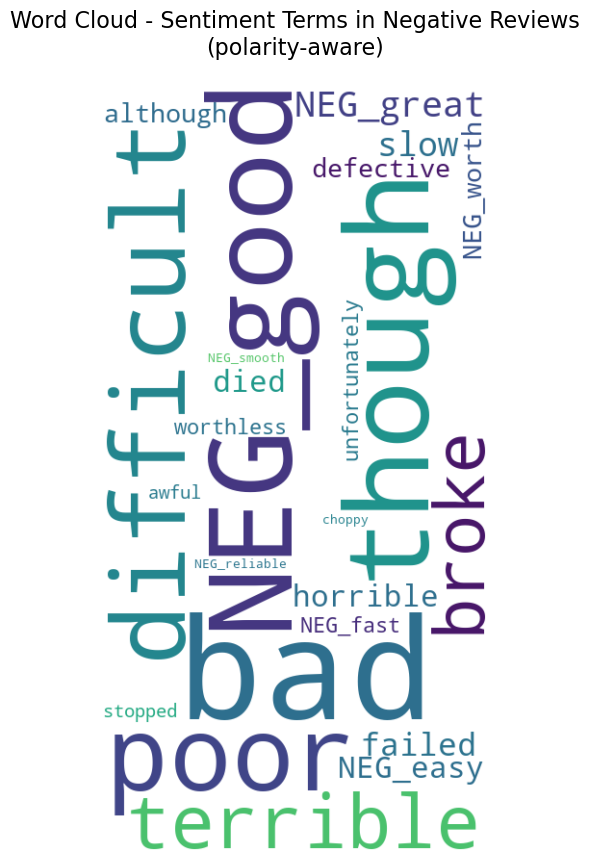

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

def create_polarity_aware_wordcloud(input_file, sentiment=None):
    """
    Create a word cloud that properly handles sentiment polarity in context.
    
    Parameters:
    input_file (str): Path to the CSV file
    sentiment (str): Optional - 'positive' or 'negative' to filter by sentiment
    """
    # Read the dataset
    df = pd.read_csv(input_file)
    
    # Filter by sentiment if specified
    if sentiment:
        df = df[df['sentiment'] == sentiment]
    
    # Define sentiment words with polarity
    positive_words = {
        'good', 'great', 'excellent', 'perfect', 'awesome', 'wonderful',
        'fast', 'reliable', 'worth', 'easy', 'smooth', 'responsive'
    }
    
    negative_words = {
        'bad', 'poor', 'terrible', 'horrible', 'awful', 'slow', 'unreliable',
        'worthless', 'difficult', 'choppy', 'unresponsive', 'defective'
    }
    
    # Define negation words
    negation_words = {
        'not', 'no', 'never', "isn't", "wasn't", "aren't", "don't",
        "doesn't", "won't", "can't", "couldn't", "wouldn't", "shouldn't"
    }
    
    # Define context modifiers
    context_modifiers = {
        'but', 'however', 'although', 'though', 'unfortunately',
        'until', 'broke', 'failed', 'stopped', 'died'
    }
    
    def process_review_polarity(text):
        """Process text with polarity awareness."""
        text = text.lower()
        sentences = re.split(r'[.!?]+', text)
        result = []
        
        for sentence in sentences:
            words = sentence.split()
            if not words:
                continue
            
            # Initialize processing flags
            neg_window = 0
            has_context_modifier = any(word in context_modifiers for word in words)
            
            processed_words = []
            for i, word in enumerate(words):
                if word in negation_words:
                    neg_window = 3
                    continue  # Skip negation words in output
                
                # Handle sentiment words based on context
                if word in positive_words:
                    if sentiment == 'negative':
                        if neg_window > 0 or has_context_modifier:
                            processed_words.append(f"NEG_{word}")
                        # Skip positive words in negative reviews unless negated
                    neg_window = max(0, neg_window - 1)
                elif word in negative_words:
                    if neg_window > 0:
                        # Skip negated negative words (double negative)
                        neg_window = max(0, neg_window - 1)
                    else:
                        processed_words.append(word)
                elif word in context_modifiers:
                    # Keep context modifiers for reference
                    processed_words.append(word)
                else:
                    if neg_window > 0:
                        neg_window = max(0, neg_window - 1)
            
            if processed_words:
                result.extend(processed_words)
        
        return ' '.join(result)
    
    # Process all reviews
    processed_text = ' '.join(df['review_text'].dropna().astype(str).apply(process_review_polarity))
    
    # Create word frequencies
    words = processed_text.split()
    word_freq = Counter(word for word in words 
                       if word in positive_words or 
                       word in negative_words or
                       (word.startswith('NEG_') and word[4:] in positive_words))
    
    # Print frequencies by category
    print(f"\nTop terms for {sentiment if sentiment else 'all'} reviews:")
    print("\nNegative Terms:")
    neg_terms = {word: count for word, count in word_freq.items() 
                if word in negative_words}
    for word, count in sorted(neg_terms.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"  {word}: {count}")
        
    print("\nNegated Positive Terms:")
    negated_pos_terms = {word: count for word, count in word_freq.items() 
                        if word.startswith('NEG_')}
    for word, count in sorted(negated_pos_terms.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"  {word}: {count}")
    
    # Create and configure the WordCloud object
    wordcloud = WordCloud(
        height=800,
        background_color='white',
        max_words=100,
        collocations=False,
        contour_width=3,
        contour_color='steelblue'
    )
    
    # Generate word cloud
    wordcloud = wordcloud.generate(processed_text)
    
    # Create the plot
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    # Add title
    title = "Word Cloud - Sentiment Terms in "
    title += f"{sentiment.capitalize() if sentiment else 'All'} Reviews\n(polarity-aware)"
    plt.title(title, fontsize=16, pad=20)
    
    plt.show()

# Example usage
input_file = "../data/processed/final_indepth_sentiment_analysis_w_processed_category.csv"

# Generate word cloud for negative reviews
create_polarity_aware_wordcloud(input_file, sentiment='negative')


Sentiment Term Analysis Summary

Quality Category Analysis
--------------------------------------------------------------------------------
Term            Pos Count  Neg Count  Pos/10k    Neg/10k    Ratio
--------------------------------------------------------------------------------
great           1360       19            32.38      7.69       4.21
good            1172       28            27.90     11.34       2.46
perfect         234        3              5.57      1.21       4.59
excellent       214        0              5.10      0.00        inf
solid           134        4              3.19      1.62       1.97
bad             98         27             2.33     10.93       0.21
cheap           100        8              2.38      3.24       0.73
sturdy          68         3              1.62      1.21       1.33
durable         48         0              1.14      0.00        inf
poor            29         15             0.69      6.07       0.11
superior        31         1    

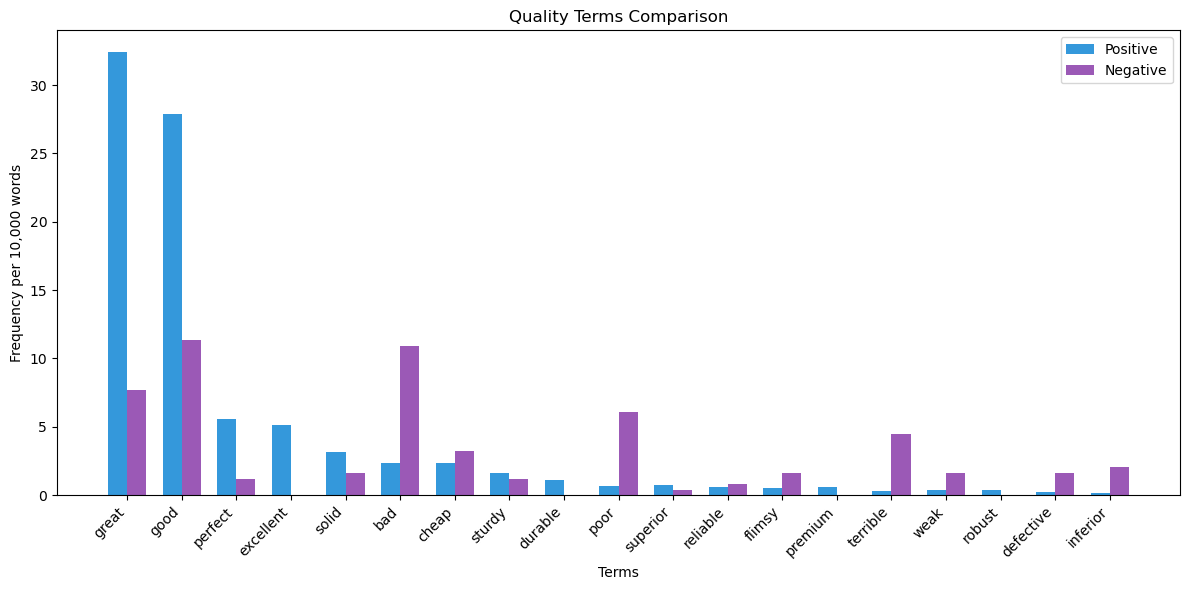

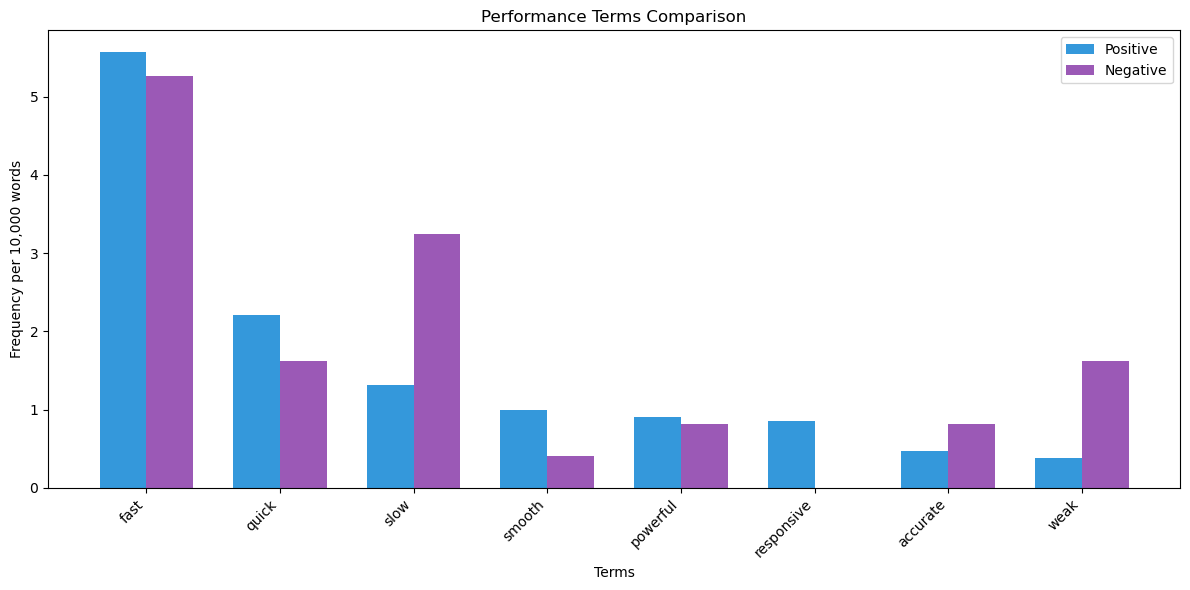

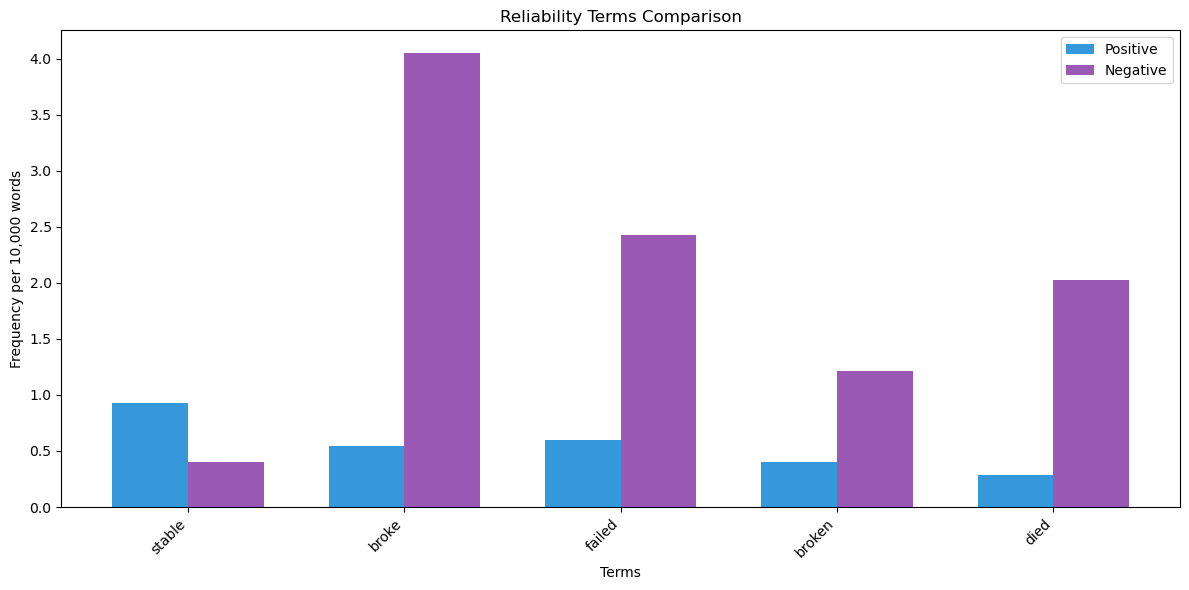

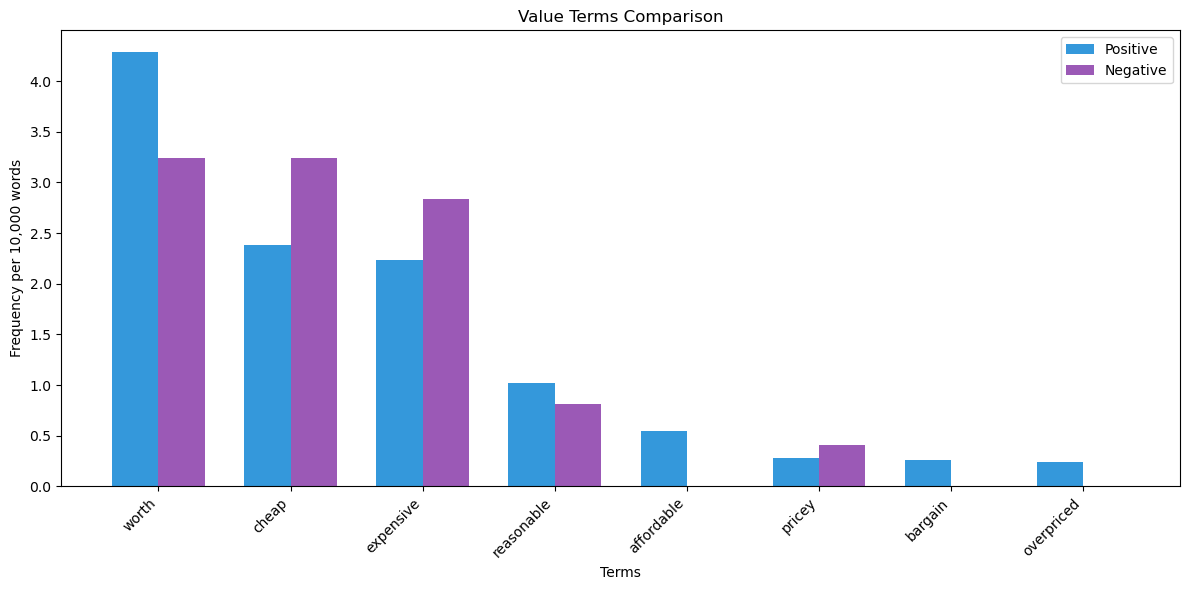

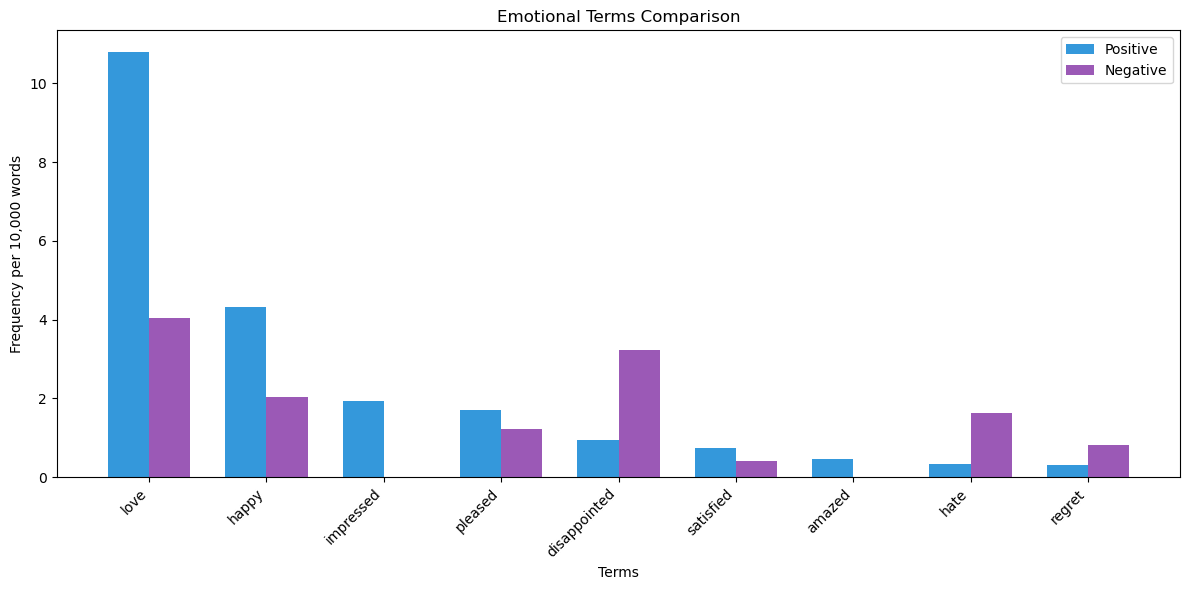

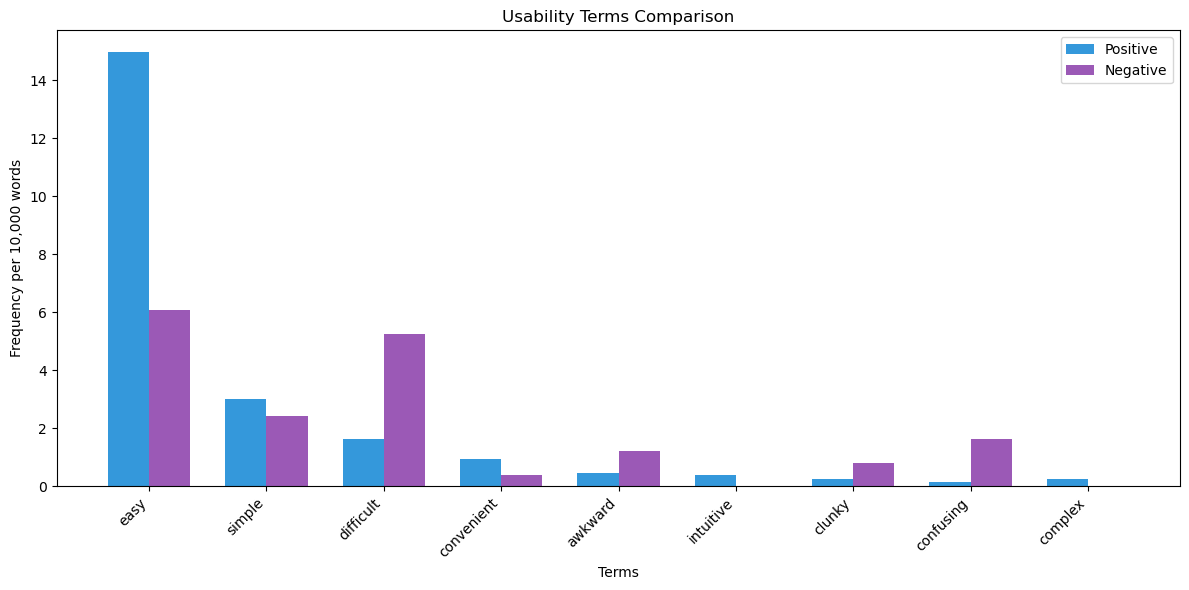

In [5]:
import pandas as pd
import numpy as np
from collections import Counter
from typing import Dict, Set, List, Tuple
import matplotlib.pyplot as plt
import seaborn as sns


# Define color scheme
COLORS = {
    'primary': '#3498db',    # Blue
    'secondary': '#9b59b6',  # Purple
    'tertiary': '#1abc9c'    # Turquoise
}

class SentimentTermAnalyzer:
    def __init__(self, input_file: str):
        """Initialize the analyzer with input file path and sentiment categories."""
        self.df = pd.read_csv(input_file)
        self.categories = {
            'Quality': {
                'excellent', 'poor', 'terrible', 'great', 'good', 'bad', 'superior',
                'inferior', 'perfect', 'flawless', 'defective', 'solid', 'weak',
                'premium', 'cheap', 'reliable', 'unreliable', 'durable', 'flimsy',
                'robust', 'sturdy', 'fragile'
            },
            'Performance': {
                'fast', 'slow', 'quick', 'laggy', 'responsive', 'unresponsive',
                'smooth', 'choppy', 'efficient', 'inefficient', 'powerful',
                'weak', 'consistent', 'inconsistent', 'accurate', 'inaccurate'
            },
            'Reliability': {
                'broke', 'broken', 'lasting', 'failed', 'fails', 'stable',
                'unstable', 'consistent', 'inconsistent', 'dependable',
                'undependable', 'trustworthy', 'unreliable', 'dies', 'died'
            },
            'Value': {
                'expensive', 'overpriced', 'cheap', 'reasonable', 'worth',
                'worthwhile', 'bargain', 'costly', 'affordable', 'unaffordable',
                'valuable', 'invaluable', 'pricey', 'pricy'
            },
            'Emotional': {
                'love', 'hate', 'disappointed', 'satisfied', 'happy', 'unhappy',
                'pleased', 'displeased', 'amazed', 'frustrated', 'angry',
                'delighted', 'regret', 'impressed', 'unimpressed'
            },
            'Usability': {
                'easy', 'difficult', 'simple', 'complicated', 'intuitive',
                'confusing', 'straightforward', 'complex', 'convenient',
                'inconvenient', 'user-friendly', 'clunky', 'awkward'
            }
        }
        
    def preprocess_reviews(self) -> Tuple[List[str], List[str], Counter, Counter]:
        """Preprocess reviews and return word frequencies for positive and negative reviews."""
        pos_reviews = self.df[self.df['sentiment'] == 'positive']['review_text'].str.lower()
        neg_reviews = self.df[self.df['sentiment'] == 'negative']['review_text'].str.lower()
        
        pos_words = ' '.join(pos_reviews.dropna()).split()
        neg_words = ' '.join(neg_reviews.dropna()).split()
        
        return pos_words, neg_words, Counter(pos_words), Counter(neg_words)

    def calculate_term_metrics(self, term: str, pos_freq: Counter, neg_freq: Counter,
                             total_pos: int, total_neg: int) -> Dict:
        """Calculate metrics for a given term."""
        pos_count = pos_freq[term]
        neg_count = neg_freq[term]
        
        if pos_count + neg_count == 0:
            return None
            
        pos_pct = (pos_count / total_pos) * 10000  # Per 10,000 words
        neg_pct = (neg_count / total_neg) * 10000
        
        # Calculate ratio with handling for division by zero
        if neg_count == 0:
            ratio = float('inf') if pos_count > 0 else 0
        else:
            ratio = (pos_count / total_pos) / (neg_count / total_neg)
            
        return {
            'term': term,
            'pos_count': pos_count,
            'neg_count': neg_count,
            'pos_pct': pos_pct,
            'neg_pct': neg_pct,
            'ratio': ratio,
            'total_count': pos_count + neg_count
        }

    def analyze_categories(self, min_frequency: int = 10) -> Dict:
        """Analyze terms by category and return comprehensive results."""
        pos_words, neg_words, pos_freq, neg_freq = self.preprocess_reviews()
        total_pos, total_neg = len(pos_words), len(neg_words)
        
        results = {}
        for category, terms in self.categories.items():
            category_results = []
            for term in terms:
                metrics = self.calculate_term_metrics(term, pos_freq, neg_freq, total_pos, total_neg)
                if metrics and metrics['total_count'] >= min_frequency:
                    category_results.append(metrics)
            
            if category_results:
                results[category] = sorted(category_results, 
                                        key=lambda x: x['total_count'], 
                                        reverse=True)
        
        return results

    def generate_visualizations(self, results: Dict, output_dir: str = './'):
        """Generate visualizations for the analysis results."""
        # Create visualization for each category
        for category, terms in results.items():
            plt.figure(figsize=(12, 6))
            
            # Extract data for plotting
            terms_list = [t['term'] for t in terms]
            pos_pct = [t['pos_pct'] for t in terms]
            neg_pct = [t['neg_pct'] for t in terms]
            
            # Create grouped bar chart
            x = np.arange(len(terms_list))
            width = 0.35
            
            plt.bar(x - width/2, pos_pct, width, label='Positive', color=COLORS['primary'])
            plt.bar(x + width/2, neg_pct, width, label='Negative', color=COLORS['secondary'])
            
            plt.xlabel('Terms')
            plt.ylabel('Frequency per 10,000 words')
            plt.title(f'{category} Terms Comparison')
            plt.xticks(x, terms_list, rotation=45, ha='right')
            plt.legend()
            plt.tight_layout()
            
            # Uncomment if want to save directly
            # plt.savefig(f'{output_dir}/{category.lower()}_comparison.png')
            # plt.close()

def main(input_file: str, min_frequency: int = 10, output_dir: str = './'):
    """Main function to run the analysis."""
    analyzer = SentimentTermAnalyzer(input_file)
    results = analyzer.analyze_categories(min_frequency)
    
    # Print summary statistics
    print("\nSentiment Term Analysis Summary")
    print("=" * 80)
    
    for category, terms in results.items():
        print(f"\n{category} Category Analysis")
        print("-" * 80)
        print(f"{'Term':<15} {'Pos Count':<10} {'Neg Count':<10} {'Pos/10k':<10} {'Neg/10k':<10} {'Ratio'}")
        print("-" * 80)
        
        for term in terms:
            print(f"{term['term']:<15} {term['pos_count']:<10} {term['neg_count']:<10} "
                  f"{term['pos_pct']:>8.2f} {term['neg_pct']:>9.2f} {term['ratio']:>10.2f}")
    
    # Generate visualizations
    analyzer.generate_visualizations(results, output_dir)

if __name__ == "__main__":
    input_file = "../data/processed/final_indepth_sentiment_analysis_w_processed_category.csv"
    main(input_file)

In [6]:
import pandas as pd
import numpy as np

def analyze_keyword_products(file_path, keyword, min_reviews=3):  # Lowered minimum reviews threshold
    """
    Analyze products based on the frequency of a specific keyword in their reviews.
    
    Parameters:
    file_path (str): Path to the CSV file containing review data
    keyword (str): Keyword to search for in reviews
    min_reviews (int): Minimum number of keyword mentions required for inclusion
    
    Returns:
    tuple: (product_summary, category_summary, brand_summary) DataFrames
    """
    # Read the dataset
    df = pd.read_csv(file_path)
    
    # Remove products with 'Untitled' in their names
    df = df[~df['title'].str.contains('Untitled', case=False, na=False)]
    
    # Print total number of reviews before filtering
    total_reviews = len(df)
    
    # Create mask for reviews containing the keyword
    # Using str.contains with word boundaries
    keyword_mask = df['review_text'].str.lower().str.contains(fr'\b{keyword.lower()}\b', na=False)
    keyword_reviews = df[keyword_mask].copy()
    
    # Print diagnostic information
    print(f"\nDiagnostic Information for '{keyword}':")
    print(f"Total reviews in dataset: {total_reviews}")
    print(f"Reviews containing '{keyword}': {len(keyword_reviews)}")
    
    # If no reviews found with the keyword, return early
    if len(keyword_reviews) == 0:
        print(f"No reviews found containing the word '{keyword}'")
        return None, None, None
    
    # Group by product and calculate metrics
    product_summary = keyword_reviews.groupby(['asin', 'title', 'brand', 'main_category']).agg({
        'review_text': 'count',  # Count of keyword reviews
        'overall': ['count', 'mean'],  # Total reviews and average rating
    }).reset_index()
    
    # Flatten column names
    product_summary.columns = ['asin', 'title', 'brand', 'main_category', 
                             'keyword_review_count', 'total_reviews', 'avg_rating']
    
    # Get total reviews for each product from original dataset
    total_product_reviews = df.groupby('asin')['review_text'].count()
    product_summary['all_reviews'] = product_summary['asin'].map(total_product_reviews)
    
    # Calculate percentage of reviews containing keyword
    product_summary['keyword_percentage'] = (product_summary['keyword_review_count'] / 
                                           product_summary['all_reviews'] * 100)
    
    # Sort by number of keyword reviews
    product_summary = product_summary.sort_values('keyword_review_count', ascending=False)
    
    # Filter for products with minimum required keyword reviews
    product_summary = product_summary[product_summary['keyword_review_count'] >= min_reviews]
    
    # Print diagnostic information
    print(f"Products with {min_reviews}+ mentions: {len(product_summary)}")
    
    # Replace NaN values in brand with "Unknown"
    product_summary['brand'] = product_summary['brand'].fillna('Unknown')
    
    # Only proceed with summaries if we have products meeting the criteria
    if len(product_summary) > 0:
        # Category analysis
        category_summary = product_summary.groupby('main_category').agg({
            'keyword_review_count': 'sum',
            'asin': 'count'
        }).sort_values('keyword_review_count', ascending=False)
        
        category_summary.columns = ['Total Keyword Reviews', 'Number of Products']
        
        # Brand analysis (excluding unknown brands)
        brand_summary = product_summary[product_summary['brand'] != 'Unknown'].groupby('brand').agg({
            'keyword_review_count': 'sum',
            'asin': 'count'
        }).sort_values('keyword_review_count', ascending=False)
        
        brand_summary.columns = ['Total Keyword Reviews', 'Number of Products']
        
        return product_summary, category_summary, brand_summary
    else:
        print(f"No products found with {min_reviews}+ mentions of '{keyword}'")
        return None, None, None

def print_keyword_analysis(keyword, product_summary, category_summary, brand_summary):
    """
    Print formatted analysis results.
    """
    if product_summary is None:
        return
        
    print(f"\nTop Products Frequently Described as '{keyword}':")
    print("-" * 120)
    print(f"{'Title':<60} {'Brand':<15} {'Category':<15} {f'{keyword} Reviews':<12} {'%':<10} {'Avg Rating'}")
    print("-" * 120)
    
    for _, row in product_summary.head(20).iterrows():
        title = row['title'][:57] + '...' if len(str(row['title'])) > 57 else str(row['title'])
        print(f"{title:<60} {str(row['brand'])[:14]:<15} "
              f"{str(row['main_category'])[:14]:<15} {row['keyword_review_count']:<12} "
              f"{row['keyword_percentage']:>6.1f}% {row['avg_rating']:>10.1f}")
    
    if len(category_summary) > 0:
        print(f"\nCategory Distribution of Products Described as '{keyword}':")
        print("-" * 50)
        print(category_summary)
    
    if len(brand_summary) > 0:
        print(f"\nTop Brands by '{keyword}' Reviews:")
        print("-" * 50)
        print(brand_summary.head(10))

# Example usage
file_path = "../data/processed/final_indepth_sentiment_analysis_w_processed_category.csv"

# Test with multiple keywords
keywords = ['great', 'excellent', 'perfect', 'easy', 'terrible', 'poor', 'cheap', 'weak', 'failed', 'worth', 'fast']
for keyword in keywords:
    print(f"\n{'='*40} Analysis for '{keyword}' {'='*40}")
    results = analyze_keyword_products(file_path, keyword, min_reviews=3)  # Lowered threshold
    if results[0] is not None:
        print_keyword_analysis(keyword, *results)


======================================== Analysis for 'great' ========================================

Diagnostic Information for 'great':
Total reviews in dataset: 3127
Reviews containing 'great': 929
Products with 3+ mentions: 53

Top Products Frequently Described as 'great':
------------------------------------------------------------------------------------------------------------------------
Title                                                        Brand           Category        great Reviews %          Avg Rating
------------------------------------------------------------------------------------------------------------------------
iPad Air Keyboard Case, New Trent Airbender Pro Detachabl... New Trent       Computers       12             54.5%        4.8
Linksys WRT AC1900 Dual-Band+ Wi-Fi Wireless Router with ... Linksys         Computers       11             57.9%        4.2
Samsung 32GB up to 48MB/s EVO Class 10 Micro SDHC Card wi... Samsung         Computers       9    

## Key Findings

### Positive Sentiment Keywords
1. "Great" (929 mentions)
   - Most frequent positive keyword
   - Found in 29.7% of all reviews
   - Particularly common in computer accessories and networking products
   - Samsung and New Trent lead brands with "great" mentions

2. "Excellent" (149 mentions)
   - Much less frequent than "great"
   - Only one product (MOCREO Bluetooth Speaker) had 3+ mentions
   - Represents more selective praise

3. "Perfect" (186 mentions)
   - Moderate usage
   - 5 products received 3+ mentions
   - Heavily concentrated in computer products

4. "Easy" (396 mentions)
   - Second most common positive keyword
   - Often associated with setup and use
   - Strong presence in computer and accessories categories

### Negative Sentiment Keywords
Notably, negative keywords showed very low frequency:
- "Terrible": 23 mentions
- "Poor": 32 mentions
- "Weak": 24 mentions
- "Failed": 29 mentions
- No products had 3+ mentions of any negative keyword

### Performance-Related Keywords
1. "Fast" (216 mentions)
   - Primarily associated with storage devices (Samsung SSDs, memory cards)
   - 11 products had 3+ mentions
   - Concentrated entirely in the Computers category

2. "Worth" (125 mentions)
   - Moderate usage
   - Only 2 products had 3+ mentions
   - Associated with value proposition

## Category Analysis
1. Computers dominates across most keywords
2. Cell Phones & Accessories shows strong presence
3. Home Audio & Theater appears frequently with positive keywords

## Brand Leadership
1. Samsung leads in multiple categories
2. New Trent shows strong positive sentiment
3. MOCREO appears consistently across different positive keywords

## Product Performance Highlights
1. iPad Air Keyboard Case (New Trent) received high mentions across multiple positive keywords
2. Samsung storage products consistently received positive speed-related feedback
3. MOCREO Bluetooth Speaker showed strong positive sentiment across multiple keywords

## Implications
1. Overwhelmingly positive sentiment in reviews (far more positive than negative keywords)
2. Computer accessories and storage devices receive the most detailed feedback
3. Ease of use and performance are key factors in positive reviews
4. Product reliability appears strong (very few failure-related mentions)

In [7]:
# This is the previous analysis
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from typing import Tuple, Optional, Dict

class KeywordAnalyzer:
    def __init__(self, file_path: str):
        """Initialize the analyzer with the data file path."""
        self.df = pd.read_csv(file_path)
        self.df['brand'] = self.df['brand'].fillna('Unknown')
        
    def analyze_keyword(self, keyword: str, min_reviews: int = 3) -> Tuple[Optional[pd.DataFrame], 
                                                                          Optional[pd.DataFrame], 
                                                                          Optional[pd.DataFrame]]:
        """Analyze products based on keyword frequency in reviews."""
        # Remove products with 'Untitled' in their names
        df_clean = self.df[~self.df['title'].str.contains('Untitled', case=False, na=False)]
        
        # Create keyword mask
        keyword_mask = df_clean['review_text'].str.lower().str.contains(fr'\b{keyword.lower()}\b', na=False)
        keyword_reviews = df_clean[keyword_mask].copy()
        
        # Print diagnostic information
        print(f"\nAnalysis for '{keyword}':")
        print(f"Total reviews: {len(df_clean):,}")
        print(f"Reviews containing '{keyword}': {len(keyword_reviews):,}")
        
        if len(keyword_reviews) == 0:
            return None, None, None
            
        # Group by product and calculate metrics
        product_summary = keyword_reviews.groupby(['asin', 'title', 'brand', 'main_category']).agg({
            'review_text': 'count',
            'overall': ['count', 'mean']
        }).reset_index()
        
        # Flatten column names
        product_summary.columns = ['asin', 'title', 'brand', 'main_category', 
                                 'keyword_review_count', 'total_reviews', 'avg_rating']
        
        # Calculate total reviews and keyword percentage
        total_product_reviews = df_clean.groupby('asin')['review_text'].count()
        product_summary['all_reviews'] = product_summary['asin'].map(total_product_reviews)
        product_summary['keyword_percentage'] = (product_summary['keyword_review_count'] / 
                                               product_summary['all_reviews'] * 100)
        
        # Filter and sort
        product_summary = product_summary[product_summary['keyword_review_count'] >= min_reviews]
        product_summary = product_summary.sort_values('keyword_review_count', ascending=False)
        
        if len(product_summary) == 0:
            return None, None, None
            
        # Category and brand summaries
        category_summary = self._create_category_summary(product_summary)
        brand_summary = self._create_brand_summary(product_summary)
        
        return product_summary, category_summary, brand_summary
        
    def _create_category_summary(self, product_summary: pd.DataFrame) -> pd.DataFrame:
        """Create category-level summary statistics."""
        return product_summary.groupby('main_category').agg({
            'keyword_review_count': 'sum',
            'asin': 'count',
            'avg_rating': 'mean'
        }).sort_values('keyword_review_count', ascending=False)
        
    def _create_brand_summary(self, product_summary: pd.DataFrame) -> pd.DataFrame:
        """Create brand-level summary statistics."""
        return product_summary[product_summary['brand'] != 'Unknown'].groupby('brand').agg({
            'keyword_review_count': 'sum',
            'asin': 'count',
            'avg_rating': 'mean'
        }).sort_values('keyword_review_count', ascending=False)

    def create_visualizations(self, keyword: str, product_summary: pd.DataFrame, 
                            category_summary: pd.DataFrame, brand_summary: pd.DataFrame,
                            output_dir: str = './'):
        """Generate and display comprehensive visualizations for the keyword analysis."""
        if product_summary is None:
            return {}
            
        figs = {}  # Store all figures to return them
            
        # 1. Category Distribution
        category_data = category_summary.reset_index()
        fig1 = px.bar(category_data,
                    y='main_category',
                    x='keyword_review_count',
                    title=f'Category Distribution of "{keyword}" Reviews',
                    labels={'main_category': 'Category',
                           'keyword_review_count': 'Number of Reviews'},
                    text='keyword_review_count')
        
        fig1.update_traces(texttemplate='%{text:,}', textposition='outside')
        fig1.show()
        figs['category_distribution'] = fig1
        
        # 2. Top Brands Analysis
        top_brands = brand_summary.head(10).reset_index()
        
        fig2 = make_subplots(specs=[[{"secondary_y": True}]])
        
        fig2.add_trace(
            go.Bar(x=top_brands['brand'],
                  y=top_brands['keyword_review_count'],
                  name='Review Count',
                  marker_color='lightblue'),
            secondary_y=False
        )
        
        fig2.add_trace(
            go.Scatter(x=top_brands['brand'],
                      y=top_brands['avg_rating'],
                      name='Average Rating',
                      line=dict(color='red', width=2),
                      mode='lines+markers'),
            secondary_y=True
        )
        
        fig2.update_layout(
            title=f'Top Brands by "{keyword}" Reviews with Average Rating',
            xaxis_title='Brand',
            yaxis_title='Number of Reviews',
            yaxis2_title='Average Rating'
        )
        
        fig2.show()
        figs['top_brands'] = fig2
        
        # 3. Rating Distribution
        fig3 = px.scatter(product_summary,
                        x='avg_rating',
                        y='keyword_percentage',
                        size='keyword_review_count',
                        hover_data=['title', 'brand'],
                        title=f'Rating vs. Usage Percentage for Products with "{keyword}" Reviews',
                        labels={'avg_rating': 'Average Rating',
                               'keyword_percentage': 'Percentage of Reviews with Keyword',
                               'keyword_review_count': 'Number of Reviews'})
        
        fig3.show()
        figs['rating_distribution'] = fig3
        
        return figs

def main(file_path: str, keywords: list, min_reviews: int = 3, output_dir: str = './'):
    """Main function to run the analysis for multiple keywords."""
    analyzer = KeywordAnalyzer(file_path)
    
    results = {}
    for keyword in keywords:
        print(f"\n{'='*40} Analysis for '{keyword}' {'='*40}")
        product_summary, category_summary, brand_summary = analyzer.analyze_keyword(keyword, min_reviews)
        
        if product_summary is not None:
            results[keyword] = {
                'data': {
                    'product_summary': product_summary,
                    'category_summary': category_summary,
                    'brand_summary': brand_summary
                },
                'figures': analyzer.create_visualizations(keyword, product_summary, 
                                                        category_summary, brand_summary, 
                                                        output_dir)
            }
            
            # Print detailed analysis
            print(f"\nTop Products Frequently Described as '{keyword}':")
            print("-" * 120)
            print(product_summary[['title', 'brand', 'main_category', 'keyword_review_count', 
                                 'keyword_percentage', 'avg_rating']].head(20))
            
            print(f"\nCategory Distribution:")
            print(category_summary)
            
            print(f"\nTop Brands:")
            print(brand_summary.head(10))
    
    return results

if __name__ == "__main__":
    file_path = "../data/processed/final_indepth_sentiment_analysis_w_processed_category.csv"
    keywords = ['great', 'excellent', 'perfect', 'easy', 'terrible', 'poor', 'cheap', 'weak', 'failed', 'worth', 'fast']
    results = main(file_path, keywords, min_reviews=3)


======================================== Analysis for 'great' ========================================

Analysis for 'great':
Total reviews: 3,127
Reviews containing 'great': 929



Top Products Frequently Described as 'great':
------------------------------------------------------------------------------------------------------------------------
                                                 title            brand  \
515  iPad Air Keyboard Case, New Trent Airbender Pr...        New Trent   
654  Linksys WRT AC1900 Dual-Band+ Wi-Fi Wireless R...          Linksys   
606  Samsung 32GB up to 48MB/s EVO Class 10 Micro S...          Samsung   
421                       GoPro HERO3+: Silver Edition            GoPro   
620  MOCREO Bluetooth Speaker Portable, IPx5 Water-...           MOCREO   
364  (Old Model) WD My Passport Ultra 2 TB Portable...  Western Digital   
538  NewTrent iPad Case 2018/2017, Heavy Duty Gladi...        New Trent   
445  Acer C720 Chromebook (11.6-Inch, 2GB) Disconti...             Acer   
436  PNY Turbo 32GB USB 3.0 Flash Drive - P-FD32GTB...              PNY   
665  Denon HEOS 3 Wireless Speaker (Discontinued by...            Denon   
221  Se


Top Products Frequently Described as 'excellent':
------------------------------------------------------------------------------------------------------------------------
                                                 title   brand  \
109  MOCREO Bluetooth Speaker Portable, IPx5 Water-...  MOCREO   

                 main_category  keyword_review_count  keyword_percentage  \
109  Cell Phones & Accessories                     4           19.047619   

     avg_rating  
109         4.5  

Category Distribution:
                           keyword_review_count  asin  avg_rating
main_category                                                    
Cell Phones & Accessories                     4     1         4.5

Top Brands:
        keyword_review_count  asin  avg_rating
brand                                         
MOCREO                     4     1         4.5

======================================== Analysis for 'perfect' ========================================

Analysis for 'perfect':


Top Products Frequently Described as 'perfect':
------------------------------------------------------------------------------------------------------------------------
                                                 title            brand  \
125  iPad Air Keyboard Case, New Trent Airbender Pr...        New Trent   
49   Sabrent 4-Port USB 2.0 Hub with Individual Pow...          Sabrent   
78   (Old Model) WD My Passport Ultra 2 TB Portable...  Western Digital   
102  Acer C720 Chromebook (11.6-Inch, 2GB) Disconti...             Acer   
151  MOCREO Bluetooth Speaker Portable, IPx5 Water-...           MOCREO   

                 main_category  keyword_review_count  keyword_percentage  \
125                  Computers                     5           22.727273   
49                   Computers                     3           13.636364   
78                   Computers                     3           10.714286   
102                  Computers                     3           20.000000   


Top Products Frequently Described as 'easy':
------------------------------------------------------------------------------------------------------------------------
                                                 title            brand  \
198  iPad Air Keyboard Case, New Trent Airbender Pr...        New Trent   
252  MOCREO Bluetooth Speaker Portable, IPx5 Water-...           MOCREO   
272  Denon HEOS 3 Wireless Speaker (Discontinued by...            Denon   
124     TP-Link N300 Wi-Fi Range Extender (TL-WA850RE)          TP-LINK   
267  Linksys WRT AC1900 Dual-Band+ Wi-Fi Wireless R...          Linksys   
209  iPad mini Case, New Trent Gladius Mini iPad Ca...          Palytte   
118  (Old Model) WD My Passport Ultra 2 TB Portable...  Western Digital   
121  Samsung Electronics 840 EVO-Series 120GB 2.5-I...          Samsung   
160                     HP Chromebook 14 (Peach Coral)               HP   
191  DanceOut & Trade Portable Wireless Bluetooth 4...        Crazedigi   
249  Sen


Top Products Frequently Described as 'worth':
------------------------------------------------------------------------------------------------------------------------
                                                title      brand  \
86  NewTrent iPad Case 2018/2017, Heavy Duty Gladi...  New Trent   
68  ASUS Whole Home Dual-Band AiMesh Router (AC190...       Asus   

   main_category  keyword_review_count  keyword_percentage  avg_rating  
86     Computers                     4           33.333333        4.75  
68     Computers                     3           21.428571        5.00  

Category Distribution:
               keyword_review_count  asin  avg_rating
main_category                                        
Computers                         7     2       4.875

Top Brands:
           keyword_review_count  asin  avg_rating
brand                                            
New Trent                     4     1        4.75
Asus                          3     1        5.00

========


Top Products Frequently Described as 'fast':
------------------------------------------------------------------------------------------------------------------------
                                                 title            brand  \
66   Samsung Electronics 840 EVO-Series 120GB 2.5-I...          Samsung   
129  Samsung 32GB up to 48MB/s EVO Class 10 Micro S...          Samsung   
23   Sony 8GB SDHC/SDXC Class 10 UHS-1 R40 Memory C...             Sony   
90   Acer C720 Chromebook (11.6-Inch, 2GB) Disconti...             Acer   
80   ASUS Whole Home Dual-Band AiMesh Router (AC190...             Asus   
81   PNY Turbo 32GB USB 3.0 Flash Drive - P-FD32GTB...              PNY   
128  Samsung 16GB EVO Class 10 SDHC Card up to 48MB...          Samsung   
33   (OLD MODEL) Crucial M500 120GB SATA 2.5” 7mm (...          Crucial   
62   (Old Model) WD My Passport Ultra 2 TB Portable...  Western Digital   
130  Samsung 64GB PRO Class 10 Micro SDXC up to 90M...          Samsung   
146  Lin

In [11]:
!pip install blis

In [15]:
# Saved output of this code in data/analysis/context_analysis.txt
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.metrics.association import BigramAssocMeasures
from nltk.corpus import stopwords
import re

# Download required NLTK data
nltk.download('stopwords')

def perform_advanced_keyword_analysis(df, column='review_text'):
    """
    Comprehensive keyword analysis combining multiple techniques
    """
    # Initialize spacy for NLP tasks
    nlp = spacy.load('en_core_web_sm')
    stop_words = set(stopwords.words('english'))
    
    def simple_tokenize(text):
        """Simple tokenization function"""
        return text.lower().split()
    
    def extract_key_phrases(text):
        """Extract meaningful phrases using dependency parsing"""
        doc = nlp(text)
        phrases = []
        
        # Extract noun phrases
        for chunk in doc.noun_chunks:
            phrases.append(chunk.text)
            
        # Extract verb phrases with their objects
        for token in doc:
            if token.dep_ == 'ROOT' and token.pos_ == 'VERB':
                phrase = token.text
                for child in token.children:
                    if child.dep_ in ['dobj', 'pobj']:
                        phrase = f"{phrase} {child.text}"
                phrases.append(phrase)
                
        return phrases

    def analyze_keyword_context(text, keyword):
        """Analyze the context around specific keywords"""
        doc = nlp(text)
        context = []
        
        for token in doc:
            if token.text.lower() == keyword.lower():
                # Get surrounding context
                left_context = ' '.join([t.text for t in token.lefts])
                right_context = ' '.join([t.text for t in token.rights])
                # Get sentiment modifiers
                modifiers = [t.text for t in token.children if t.dep_ in ['amod', 'advmod']]
                context.append({
                    'keyword': token.text,
                    'left_context': left_context,
                    'right_context': right_context,
                    'modifiers': modifiers
                })
        
        return context

    def extract_feature_specific_keywords(text, feature_type):
        """Extract keywords related to specific product features"""
        feature_patterns = {
            'performance': r'\b(fast|slow|speed|quick|lag|performance)\b',
            'quality': r'\b(quality|build|durability|reliable|solid)\b',
            'price': r'\b(price|cost|value|worth|expensive|cheap)\b',
            'usability': r'\b(easy|difficult|intuitive|user-friendly|complicated)\b'
        }
        
        pattern = feature_patterns.get(feature_type, '')
        if pattern:
            matches = re.finditer(pattern, text.lower())
            return [match.group() for match in matches]
        return []

    def calculate_keyword_impact(df):
        """Calculate the impact of keywords on ratings"""
        tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
        tfidf_matrix = tfidf.fit_transform(df[column])
        feature_names = tfidf.get_feature_names_out()
        
        # Calculate correlation with ratings
        impact_scores = {}
        for i, feature in enumerate(feature_names):
            feature_scores = tfidf_matrix[:, i].toarray().flatten()
            correlation = np.corrcoef(feature_scores, df['overall'])[0, 1]
            impact_scores[feature] = correlation
            
        return impact_scores

    def find_collocations(texts):
        """Find significant word pairs using simple tokenization"""
        words = []
        for text in texts:
            if isinstance(text, str):  # Check if text is string
                tokens = simple_tokenize(text)
                words.extend([w for w in tokens if w not in stop_words and w.isalnum()])
            
        bigram_measures = BigramAssocMeasures()
        finder = BigramCollocationFinder.from_words(words)
        
        # Filter by frequency
        finder.apply_freq_filter(3)
        
        return finder.score_ngrams(bigram_measures.pmi)

    # Perform analyses
    print("Starting analysis components...")
    results = {}
    
    try:
        results['key_phrases'] = df[column].apply(extract_key_phrases)
        print("Extracted key phrases")
        
        results['performance_keywords'] = df[column].apply(lambda x: extract_feature_specific_keywords(x, 'performance'))
        results['quality_keywords'] = df[column].apply(lambda x: extract_feature_specific_keywords(x, 'quality'))
        results['price_keywords'] = df[column].apply(lambda x: extract_feature_specific_keywords(x, 'price'))
        results['usability_keywords'] = df[column].apply(lambda x: extract_feature_specific_keywords(x, 'usability'))
        print("Extracted feature keywords")
        
        results['keyword_impact'] = calculate_keyword_impact(df)
        print("Calculated keyword impact")
        
        results['collocations'] = find_collocations(df[column])
        print("Found collocations")
        
    except Exception as e:
        print(f"Error in analysis: {e}")
        
    # Analyze specific keywords in context
    important_keywords = ['great', 'excellent', 'poor', 'terrible']
    keyword_contexts = {}
    for keyword in important_keywords:
        contexts = []
        for text in df[column]:
            if isinstance(text, str):
                contexts.extend(analyze_keyword_context(text, keyword))
        keyword_contexts[keyword] = contexts

    results['keyword_contexts'] = keyword_contexts
    
    return results

def analyze_keyword_patterns(results):
    """
    Analyze and summarize keyword patterns
    """
    summary = {
        'top_collocations': sorted(results['collocations'][:20], key=lambda x: x[1], reverse=True),
        'top_impact_keywords': sorted(
            results['keyword_impact'].items(), 
            key=lambda x: abs(x[1]), 
            reverse=True
        )[:20],
        'feature_distribution': {
            'performance': Counter([item for sublist in results['performance_keywords'] for item in sublist]),
            'quality': Counter([item for sublist in results['quality_keywords'] for item in sublist]),
            'price': Counter([item for sublist in results['price_keywords'] for item in sublist]),
            'usability': Counter([item for sublist in results['usability_keywords'] for item in sublist])
        }
    }
    
    return summary

def main():
    try:
        # Load the data
        print("Loading data...")
        file_path = "../data/processed/final_indepth_sentiment_analysis_w_processed_category.csv"
        df = pd.read_csv(file_path)
        
        # Run the analysis
        print("\nStarting keyword analysis...")
        results = perform_advanced_keyword_analysis(df, column='review_text')
        patterns = analyze_keyword_patterns(results)
        
        # Print results with error handling
        print("\n=== Analysis Results ===")
        
        try:
            print("\n=== Top Word Pairs ===")
            for pair, score in patterns['top_collocations']:
                print(f"{pair}: {score:.4f}")
        except Exception as e:
            print("Error in printing word pairs:", e)

        try:
            print("\n=== Most Impactful Keywords ===")
            for keyword, impact in patterns['top_impact_keywords']:
                print(f"{keyword}: {impact:.4f}")
        except Exception as e:
            print("Error in printing impact keywords:", e)

        try:
            print("\n=== Feature Distribution ===")
            for feature_type, counts in patterns['feature_distribution'].items():
                print(f"\n{feature_type.title()} Keywords:")
                for word, count in counts.most_common(5):
                    print(f"{word}: {count}")
        except Exception as e:
            print("Error in printing feature distribution:", e)

        try:
            print("\n=== Keyword Contexts ===")
            for keyword, contexts in results['keyword_contexts'].items():
                if contexts:
                    print(f"\nContexts for '{keyword}':")
                    print(f"Total mentions: {len(contexts)}")
                    # Show first 3 examples
                    for context in contexts[:3]:
                        print(f"\nLeft: {context['left_context']}")
                        print(f"Right: {context['right_context']}")
                        if context['modifiers']:
                            print(f"Modifiers: {', '.join(context['modifiers'])}")
        except Exception as e:
            print("Error in printing contexts:", e)

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

ValueError: BLIS support requires blis: pip install blis

1. Top Word Pairs Analysis:
- Most significant collocations are product-specific terms ('guild wars', 'skull candy', 'firepro d300')
- Technical specifications appear frequently ('wi-fi', 'lithium-ion', '5400 rpm')
- Brand names are prominent ('tripp lite', 'harman kardon')
- This suggests reviews often focus on specific product features and technical details

1. Most Impactful Keywords:
- Strong negative correlation with words like 'returned' (-0.1765), 'return' (-0.1574), and 'broke' (-0.1154)
- Positive correlation with 'great' (0.1746), 'perfect' (0.0957), and 'love' (0.0952)
- Negative experiences often relate to product failure or support issues
- Indicates reliability and customer service significantly impact ratings

1. Feature Distribution:
Performance:
- 'Fast' (381 mentions) dominates performance discussion
- Speed-related terms are crucial in reviews
- Performance issues focus more on positive aspects than negative ('slow' only 93 mentions)

Quality:
- 'Quality' is extremely prominent (919 mentions)
- 'Solid' (191) and 'build' (130) suggest durability is important
- Relatively few mentions of 'durability' might indicate it's discussed using other terms

Price:
- Price discussions are frequent (797 mentions)
- Value assessment terms ('worth': 204) are common
- Balance between positive ('worth') and negative ('expensive': 146) price discussions

Usability:
- 'Easy' dominates (740 mentions)
- Few negative usability mentions ('difficult': 91, 'complicated': 15)
- Suggests products are generally user-friendly

4. Keyword Contexts:
- 'Great' appears 1,834 times, indicating predominantly positive reviews
- 'Excellent' (272 mentions) is used more selectively
- Negative terms ('poor': 54, 'terrible': 37) are relatively rare
- The modifier 'very' appears with 'poor', suggesting emphasis on negative experiences

These results suggest that:
1. Reviews tend to be positive overall
2. Product quality and ease of use are primary concerns
3. Price-performance ratio is frequently discussed
4. Technical specifications matter to reviewers
5. Negative reviews often relate to product failures or returns

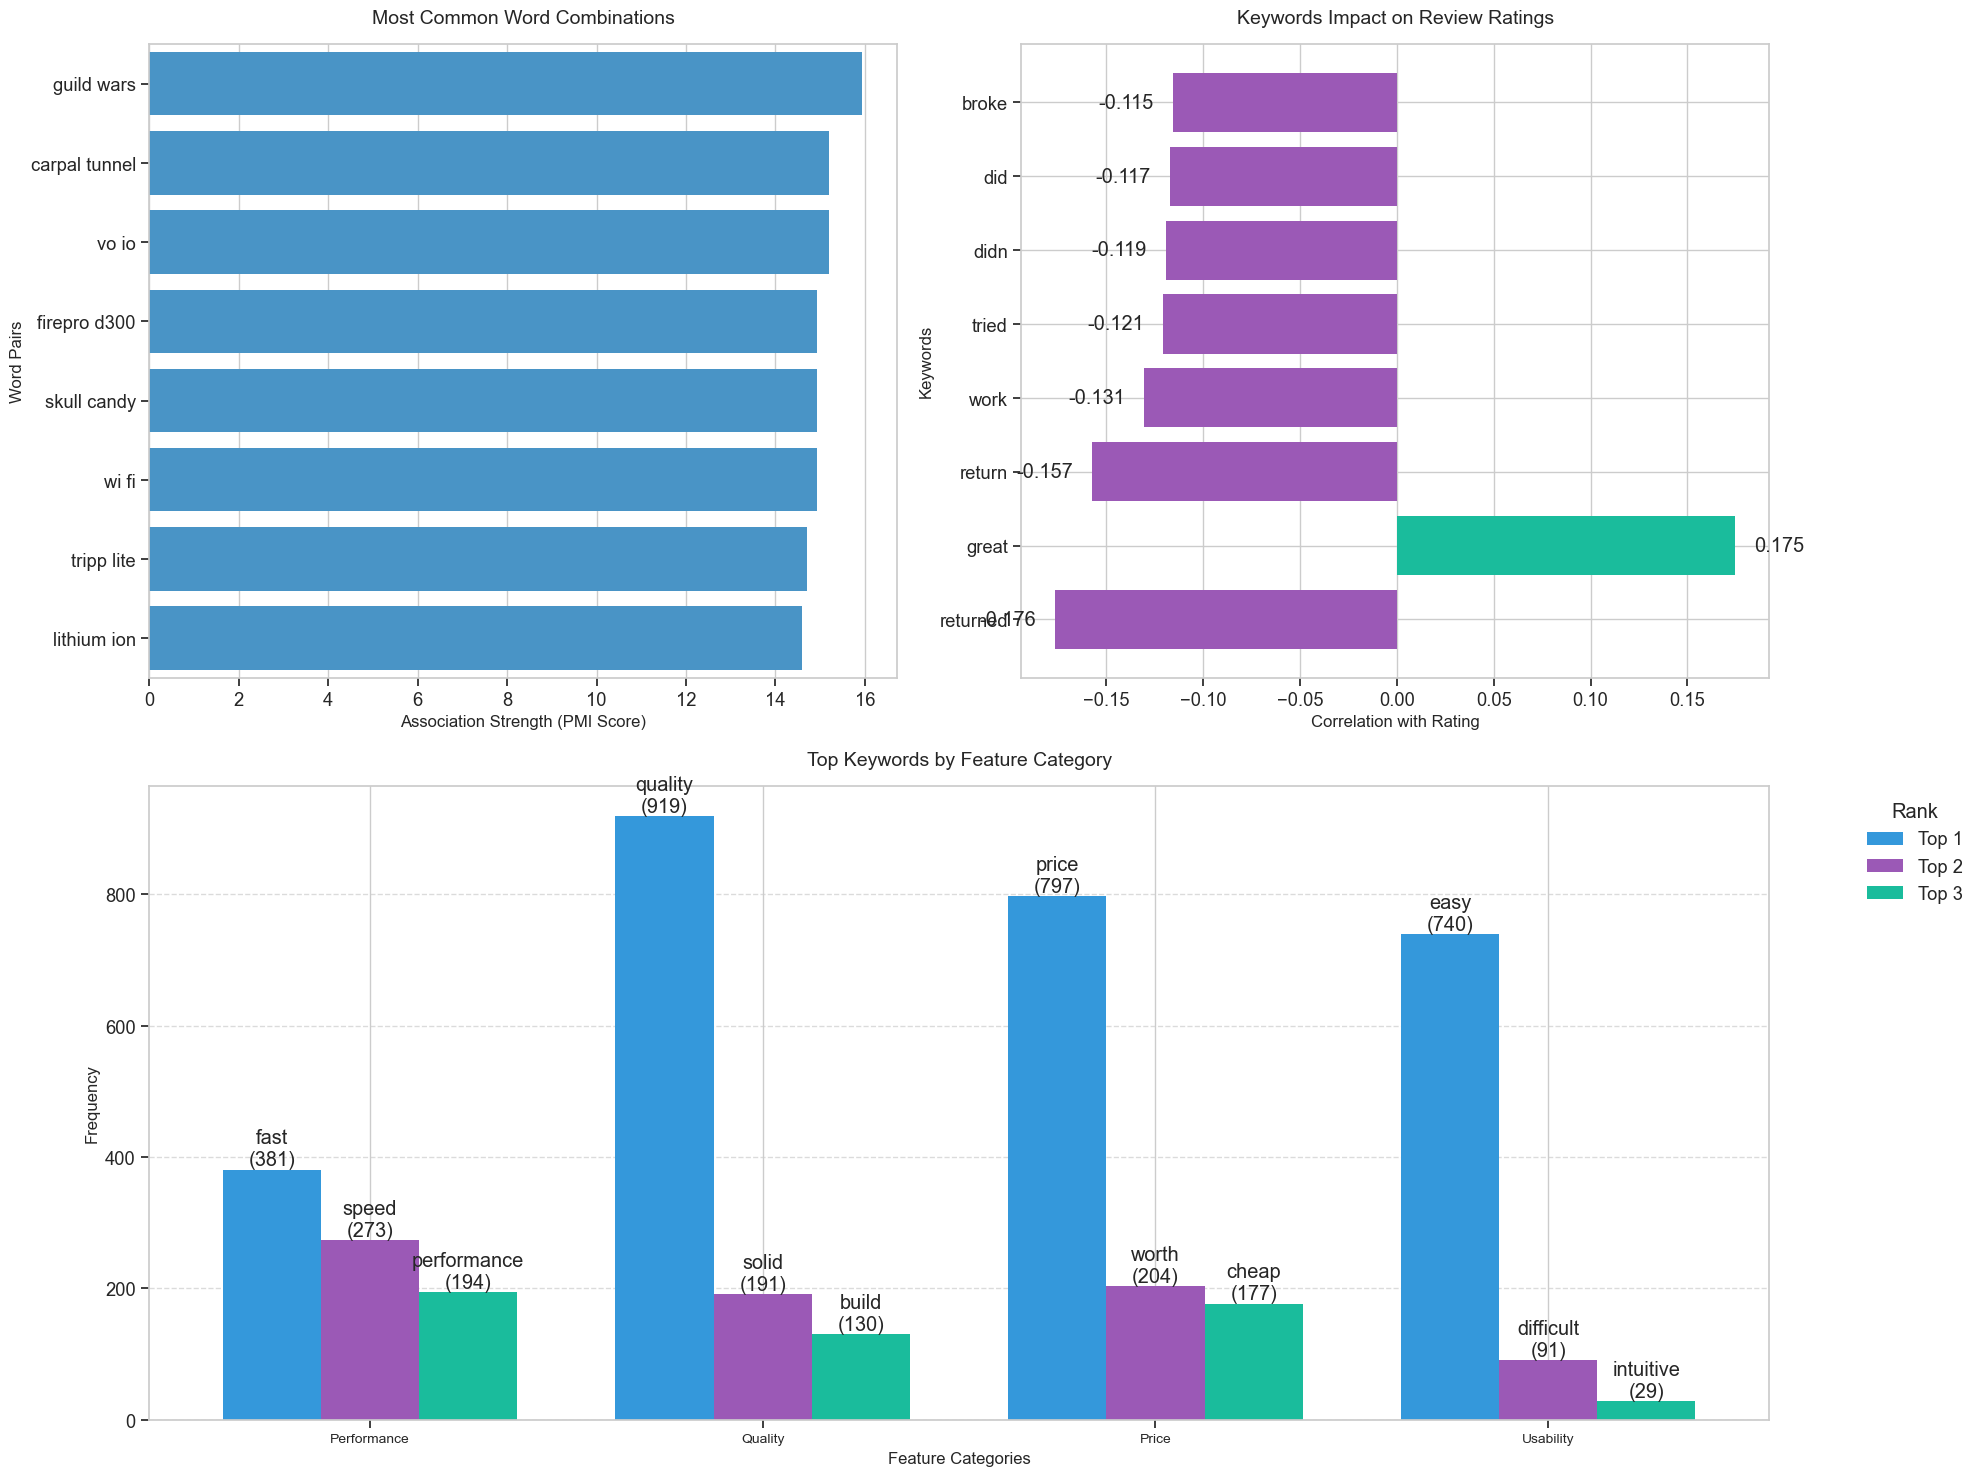

In [44]:
# Visualizations based on perform_advanced_keyword_analysis above
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Define color scheme
COLORS = {
    'primary': '#3498db',    # Blue
    'secondary': '#9b59b6',  # Purple
    'tertiary': '#1abc9c'    # Turquoise
}

def parse_analysis_file(file_path):
    """Parse the analysis text file and extract relevant data."""
    with open(file_path, 'r') as file:
        content = file.read()
    
    # Parse word pairs
    word_pairs_match = re.findall(r"\('(\w+)',\s*'(\w+)'\):\s*([\d.]+)", content)
    word_pairs = [(f"{w1} {w2}", float(score)) for w1, w2, score in word_pairs_match]
    
    # Parse impactful keywords
    impact_pattern = r"===\s*Most Impactful Keywords\s*===\n(.*?)\n\n"
    impact_section = re.search(impact_pattern, content, re.DOTALL).group(1)
    keyword_impact = []
    for line in impact_section.split('\n'):
        if line.strip():
            word, score = line.split(':')
            keyword_impact.append((word.strip(), float(score)))
    
    # Parse feature distributions
    features = {}
    categories = ['Performance', 'Quality', 'Price', 'Usability']
    
    for category in categories:
        pattern = f"{category} Keywords:(.*?)\n\n"
        match = re.search(pattern, content, re.DOTALL)
        if match:
            features[category] = {}
            for line in match.group(1).strip().split('\n'):
                if line.strip():
                    word, count = line.split(':')
                    features[category][word.strip()] = int(count)
    
    return word_pairs, keyword_impact, features

def create_visualizations(word_pairs, keyword_impact, features):
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_context("notebook", font_scale=1.2)
    
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Top Word Pairs Bar Chart
    ax1 = plt.subplot(221)
    pairs = [pair[0] for pair in word_pairs[:8]]
    scores = [pair[1] for pair in word_pairs[:8]]
    
    sns.barplot(x=scores, y=pairs, ax=ax1, color=COLORS['primary'])
    ax1.set_title('Most Common Word Combinations', fontsize=14, pad=15)
    ax1.set_xlabel('Association Strength (PMI Score)', fontsize=12)
    ax1.set_ylabel('Word Pairs', fontsize=12)
    
    # 2. Keyword Impact Chart
    ax2 = plt.subplot(222)
    impact_words = [word for word, score in keyword_impact[:8]]
    impact_scores = [score for word, score in keyword_impact[:8]]
    
    colors = [COLORS['tertiary'] if x > 0 else COLORS['secondary'] for x in impact_scores]
    bars = ax2.barh(impact_words, impact_scores, color=colors)
    ax2.set_title('Keywords Impact on Review Ratings', fontsize=14, pad=15)
    ax2.set_xlabel('Correlation with Rating', fontsize=12)
    ax2.set_ylabel('Keywords', fontsize=12)
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        label_x = width + 0.01 if width >= 0 else width - 0.01
        ax2.text(label_x, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', 
                va='center',
                ha='left' if width >= 0 else 'right')
    
    # 3. Feature Distribution Chart
    ax3 = plt.subplot(212)
    
    # Prepare data for feature distribution
    categories = list(features.keys())
    n_categories = len(categories)
    n_bars = 3  # Top 3 words per category
    
    x = np.arange(n_categories)
    width = 0.25
    
    for i in range(n_bars):
        heights = []
        labels = []
        for category in categories:
            # Get top 3 words for each category
            top_words = sorted(features[category].items(), key=lambda x: x[1], reverse=True)
            if i < len(top_words):
                heights.append(top_words[i][1])
                labels.append(top_words[i][0])
            else:
                heights.append(0)
                labels.append('')
        
        positions = x + width * i
        bars = ax3.bar(positions, heights, width,
                      label=f'Top {i+1}',
                      color=COLORS['primary'] if i == 0 else COLORS['secondary'] if i == 1 else COLORS['tertiary'])
        
        # Add value labels on bars
        for j, bar in enumerate(bars):
            if heights[j] > 0:
                ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                        f'{labels[j]}\n({heights[j]})',
                        ha='center', va='bottom')
    
    ax3.set_title('Top Keywords by Feature Category', fontsize=14, pad=15)
    ax3.set_xlabel('Feature Categories', fontsize=12)
    ax3.set_ylabel('Frequency', fontsize=12)
    ax3.set_xticks(x + width)
    ax3.set_xticklabels(categories, fontsize=10)
    ax3.legend(title='Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add grid
    ax3.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    return fig

def main():
    # Parse the file
    input_file = "../data/analysis/context_analysis.txt"
    word_pairs, keyword_impact, features = parse_analysis_file(input_file)
    
    # Create and save visualizations
    fig = create_visualizations(word_pairs, keyword_impact, features)
    # plt.savefig('sentiment_analysis_results.png', 
    #             dpi=300, 
    #             bbox_inches='tight',
    #             facecolor='white')
    # plt.close()

if __name__ == "__main__":
    main()

1. Most Common Word Combinations (Top Bar Chart):
- Shows strong word pairs that frequently appear together in reviews
- Top pairs include specific product names and technical terms:
  * "guild wars" (likely game-related)
  * "carpal tunnel" (ergonomic/health concern)
  * "vo io" (technical specification)
  * "firepro d300" (product model)
  * "skull candy" (brand name)
  * "wi fi" (common feature)
  * "tripp lite" (brand name)
  * "lithium ion" (battery type)
- High PMI scores (all above 14) indicate these pairs appear together much more frequently than by chance

1. Keywords Impact on Review Ratings (Middle Chart):
- Shows how words correlate with review ratings
- Positive correlation:
  * "great" has the strongest positive impact (0.175)
- Negative correlations:
  * "returned" has the strongest negative impact (-0.176)
  * "return," "work," "tried," "didn," "did," and "broke" all have moderate negative impacts
- This suggests product returns and functionality issues are major factors in negative reviews

1. Top Keywords by Feature Category (Bottom Chart):
- Shows frequency distribution of top words in each category
Performance:
  * "fast" (381 mentions)
  * "speed" (273 mentions)
  * "performance" (194 mentions)
Quality:
  * "quality" most mentioned (919)
  * "solid" (191 mentions)
  * "build" (130 mentions)
Price:
  * "price" (797 mentions)
  * "worth" (204 mentions)
  * "cheap" (177 mentions)
Usability:
  * "easy" (740 mentions)
  * "difficult" (91 mentions)
  * "intuitive" (29 mentions)

Key Insights:
- Technical specifications and brand names are commonly discussed together
- Product returns and functionality issues are strong indicators of negative reviews
- Quality and price are the most frequently discussed features
- Ease of use is important but discussed less frequently than other features

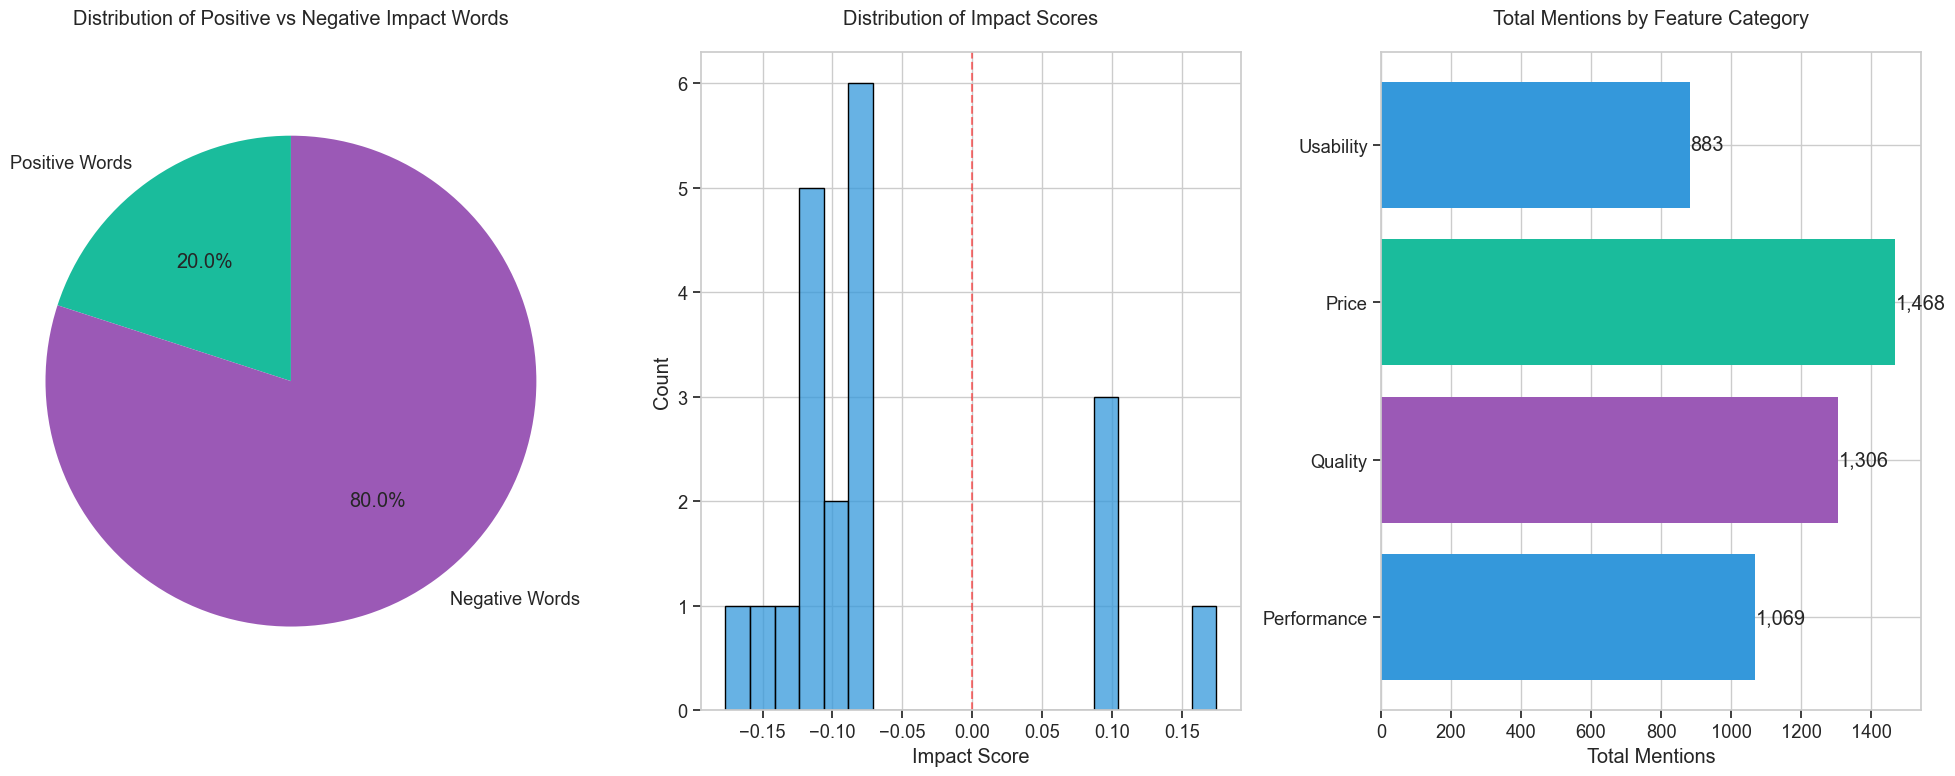

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define color scheme
COLORS = {
    'primary': '#3498db',    # Blue
    'secondary': '#9b59b6',  # Purple
    'tertiary': '#1abc9c'    # Turquoise
}

def create_three_visualizations(keyword_impact, features):
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_context("notebook", font_scale=1.2)
    
    # Create figure with adjusted layout for three charts
    fig = plt.figure(figsize=(20, 8))
    
    # 1. Positive vs Negative Keywords Distribution (Pie Chart)
    ax1 = plt.subplot(131)
    positive_words = [(word, score) for word, score in keyword_impact if score > 0]
    negative_words = [(word, score) for word, score in keyword_impact if score < 0]
    
    labels = ['Positive Words', 'Negative Words']
    sizes = [len(positive_words), len(negative_words)]
    colors = [COLORS['tertiary'], COLORS['secondary']]
    
    ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
            startangle=90)
    ax1.axis('equal')
    ax1.set_title('Distribution of Positive vs Negative Impact Words', pad=20)
    
    # 2. Impact Score Distribution (Histogram)
    ax2 = plt.subplot(132)
    impact_scores = [score for _, score in keyword_impact]
    
    sns.histplot(impact_scores, bins=20, color=COLORS['primary'], ax=ax2)
    ax2.axvline(x=0, color='red', linestyle='--', alpha=0.5)
    ax2.set_title('Distribution of Impact Scores', pad=20)
    ax2.set_xlabel('Impact Score')
    ax2.set_ylabel('Count')
    
    # 3. Feature Category Comparison (Horizontal Bar Chart)
    ax3 = plt.subplot(133)
    
    # Calculate total mentions for each category
    category_totals = {}
    for category, words in features.items():
        category_totals[category] = sum(words.values())
    
    # Create horizontal bar chart
    categories = list(category_totals.keys())
    totals = list(category_totals.values())
    
    bars = ax3.barh(categories, totals, color=list(COLORS.values())[:len(categories)])
    ax3.set_title('Total Mentions by Feature Category', pad=20)
    ax3.set_xlabel('Total Mentions')
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        ax3.text(width + 1, bar.get_y() + bar.get_height()/2,
                f'{int(width):,}',
                va='center')
    
    plt.tight_layout()
    return fig

def main():
    # Parse your existing data
    input_file = "../data/analysis/context_analysis.txt"
    word_pairs, keyword_impact, features = parse_analysis_file(input_file)
    
    # Create visualizations
    fig = create_three_visualizations(keyword_impact, features)
    plt.savefig('sentiment_analysis_three_charts.png', 
                dpi=300, 
                bbox_inches='tight',
                facecolor='white')
    
    # plt.close()

if __name__ == "__main__":
    main()

1. Distribution of Positive vs Negative Impact Words (Pie Chart):
- 80% of impactful words in reviews are negative
- Only 20% are positive words
- This suggests customers are more likely to use negative words with strong impact when writing reviews
- This could indicate that customers are more expressive when describing problems or dissatisfaction

2. Distribution of Impact Scores (Histogram):
- The histogram shows how strong the words' impacts are on ratings
- Negative scores (left of red dashed line) indicate words associated with lower ratings
- Positive scores (right of red dashed line) indicate words associated with higher ratings
- There's a concentration of moderately negative words (around -0.10)
- Few words have very strong impacts (either positive or negative)
- The distribution is slightly skewed toward negative impacts

3. Total Mentions by Feature Category (Horizontal Bar Chart):
- Price is the most discussed feature (1,468 mentions)
- Followed by Quality (1,306 mentions)
- Performance (1,069 mentions)
- Usability has the fewest mentions (883)
- This suggests customers are most concerned about price-related aspects of electronics products
- Quality and performance are also significant factors in reviews

Key Insights:
- While price gets the most mentions, the high proportion of negative impact words suggests many customers are expressing dissatisfaction
- The concentration of moderate negative impact scores suggests consistent but not extreme criticism
- The distribution across feature categories is relatively balanced, indicating customers consider multiple aspects when reviewing products